# MSA 7C:(None Mass) Shooting Analysis: GVA Data Exploration (Minnesota, 2024)

In [1]:
import json
import pandas as pd
import numpy as np
import random
from pathlib import Path

import seaborn as sns
from matplotlib.colors import LogNorm
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
import myst_nb
import wikipedia as wp
import math



## Loading Data & Formatting Dates for Analysis

In [2]:
# Disable scientific notation globally
mpl.rcParams['axes.formatter.useoffset'] = False
mpl.rcParams['axes.formatter.use_mathtext'] = False
mpl.rcParams['axes.formatter.limits'] = (-999, 999)  # forces normal numbers

In [3]:
df = pd.read_csv('MSA Data\GVA_Minnesota_24.csv')
scope = 'Minnesota, 2024'
len(df)

516

In [4]:
df.head(3)

,Incident ID,Incident Date,State,City Or County,Address,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Operations
0,3106916,"December 31, 2024",Minnesota,Minneapolis,3700 block of Emerson Ave N,0,1,0,0,1,NaN
1,3106949,"December 31, 2024",Minnesota,Mankato,20946 549th Ave,0,1,0,0,1,NaN
2,3104463,"December 29, 2024",Minnesota,Saint Paul,306 Larpenteur Ave E,0,2,0,0,1,NaN


In [5]:
df.dtypes

Incident ID            int64
Incident Date         object
State                 object
City Or County        object
Address               object
Victims Killed         int64
Victims Injured        int64
Suspects Killed        int64
Suspects Injured       int64
Suspects Arrested      int64
Operations           float64
dtype: object

In [6]:
df['date'] = pd.to_datetime(df['Incident Date'], format = '%B %d, %Y', errors = 'coerce')

In [7]:
df = df.rename(columns={
    'City Or County': 'city',
    'Address': 'address',
    'Victims Killed': 'v_killed',
    'Victims Injured': 'v_injured',
    'Suspects Killed': 's_killed',
    'Suspects Injured': 's_injured',
    'Suspects Arrested': 's_arrested',
    'Incident ID': 'id'
    })
df.head(2)

,id,Incident Date,State,city,address,v_killed,v_injured,s_killed,s_injured,s_arrested,Operations,date
0,3106916,"December 31, 2024",Minnesota,Minneapolis,3700 block of Emerson Ave N,0,1,0,0,1,NaN,2024-12-31
1,3106949,"December 31, 2024",Minnesota,Mankato,20946 549th Ave,0,1,0,0,1,NaN,2024-12-31


In [8]:
df['dow'] = df['date'].dt.day_name().str[:3]
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month_name().str[:3]
df['week'] = df['date'].dt.isocalendar().week
df['t_kill'] = df['v_killed'] + df['s_killed']
df['t_inj'] = df['v_injured'] + df['s_injured']
df['total'] = df['t_inj'] + df['t_kill']

In [9]:
df = df[[ 'date', 'dow','day', 'month', 'week','city', 'address', 'v_killed',
       'v_injured', 's_killed', 's_injured', 's_arrested', 't_kill', 't_inj', 'total', 'id']]
df.head(2)

,date,dow,day,month,week,city,address,v_killed,v_injured,s_killed,s_injured,s_arrested,t_kill,t_inj,total,id
0,2024-12-31,Tue,31,Dec,1,Minneapolis,3700 block of Emerson Ave N,0,1,0,0,1,0,1,1,3106916
1,2024-12-31,Tue,31,Dec,1,Mankato,20946 549th Ave,0,1,0,0,1,0,1,1,3106949


## Largest Shooting Incidents in the State in 2024

In [10]:
df.nlargest(10, 'total').reset_index(drop=True)

,date,dow,day,month,week,city,address,v_killed,v_injured,s_killed,s_injured,s_arrested,t_kill,t_inj,total,id
0,2024-05-30,Thu,30,May,22,Minneapolis,2221 Blaisdell Ave,3,3,1,0,0,4,3,7,2925929
1,2024-07-15,Mon,15,Jul,29,Minneapolis,16th Ave S and E Franklin Ave,1,5,0,0,0,1,5,6,2969835
2,2024-11-07,Thu,7,Nov,45,Duluth,6009 Tacony St,4,0,1,0,0,5,0,5,3066278
3,2024-09-21,Sat,21,Sep,38,Minneapolis,10 S 5th St,2,3,0,0,1,2,3,5,3029992
4,2024-08-30,Fri,30,Aug,35,Burnsville,12100 River Hills Dr,0,5,0,0,0,0,5,5,3010531
5,2024-02-18,Sun,18,Feb,7,Burnsville,12605 33rd Ave,3,1,1,0,0,4,1,5,2832334
6,2024-10-27,Sun,27,Oct,43,Minneapolis,4400 block of Snelling Ave,3,0,0,1,1,3,1,4,3057363
7,2024-09-18,Wed,18,Sep,38,Minneapolis,17th Ave S and E 26th St,2,2,0,0,1,2,2,4,3027735
8,2024-08-18,Sun,18,Aug,33,Minneapolis,1200 block of W Broadway Ave,0,4,0,0,0,0,4,4,2998510
9,2024-05-25,Sat,25,May,21,Saint Paul (North Saint Paul),2039 17th Ave E,0,4,0,0,0,0,4,4,2921097


## Shooting Incidents over the Calendar Year - 2024

In [11]:
day_colours = {
    "Mon": "#a2bffe",  # pastel blue
    "Tue": "#7af9ab",  # Sea Foam Green
    "Wed": "#ffff14",  # Yellow
    "Thu": "#fdaa48",  # Light Orange    
    "Fri": "#ff474c",  # Light Red
    "Sat": "#910951",  # Reddish Purple
    "Sun": "#632de9",  # Purple Blue
}

In [12]:
month_colours = {
    "Jan": "#4C72B0", "Feb": "#6BAED6", "Mar": "#9ECAE1",
    "Apr": "#41AB5D", "May": "#74C476", "Jun": "#A1D99B",
    "Jul": "#FEC44F", "Aug": "#FE9929", "Sep": "#EC7014",
    "Oct": "#E6550D", "Nov": "#A63603", "Dec": "#756BB1"
}

Text(0.5, 0, 'Month')

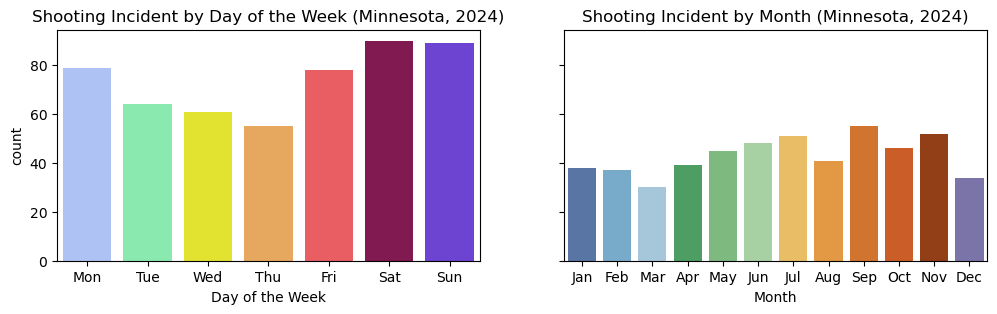

In [13]:
# Set up the matplotlib figure
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 3), sharey=True)

sns.countplot(df, x='dow', ax=ax1, palette = day_colours, hue='dow',
              order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
             ).set_title('Shooting Incident by Day of the Week (' + scope + ')')
ax1.set_xlabel("Day of the Week")

sns.countplot(df, x='month', ax=ax2,palette = month_colours, hue='month',
              order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug','Sep','Oct','Nov', 'Dec']
             ).set_title('Shooting Incident by Month (' + scope + ')')
ax2.set_xlabel("Month")
#plt.set_title('Mass Shooting Incident by Day of the Week & Month (\'14-\'24)')


**Day of the Week:** For all shooting incidents in Minnesota in 2024 we see the same kind of pattern over the week as we saw with the national level data for MSI over 10 years, with most occuring over the weekend but Saturday has slightly more incidents than on Sundays here. There are also a greater share of incidents on Mondays which is approximately level with Fridays.

**Month of the Year:** While the pattern of the first half of shooting incidents in 2024 in Minnesota appears to follow the national trend of MSIs, with a steady increase as you get towards midsummer, the Autumn months have many more incidents than the national pattern would predict, with most incidents occurring in September, followed by November and then July.

Text(0.5, 1.0, 'Shooting Incident by Week (Minnesota, 2024)')

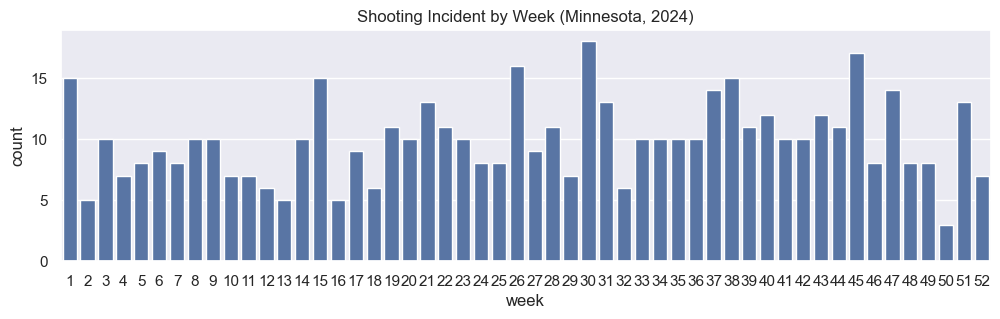

In [14]:
sns.set_theme()
plt.figure(figsize=(12,3))
sns.countplot(df, x='week', order=range(1,53), legend=False,).set_title('Shooting Incident by Week (' + scope + ')')

**Week # of the Year:** Week number 30 had the most shooting incidents in Minnesota in 2024, there are about 15 other weeks with more than 10 incidents, and the rest generally between 5 and 10 incidents.

Text(0.5, 1.0, 'Shooting Incident by Day of Month (Minnesota, 2024)')

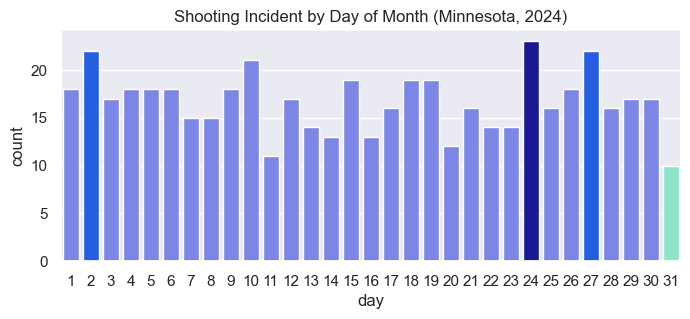

In [15]:
sns.set_theme()
plt.figure(figsize=(8,3))

all_days = sorted(df['day'].unique())
highlight_day = 31    
base_color = '#6a79f7'       # Cornflower Blue
highlight_color = "#7ef4cc" # Turquoise

day_palette = {day: base_color for day in all_days}
day_palette[highlight_day] = highlight_color
day_palette[24] = '#0504aa' #Royal Blue
day_palette[2] = '#0652ff' # Electric Blue
day_palette[27] = '#0652ff' # Electric Blue
sns.countplot(df, x='day', order=range(1,32), palette=day_palette, hue = 'day', legend=False,).set_title('Shooting Incident by Day of Month (' + scope + ')')

**Day of the Month**
* The distribution of shooting incidents by day of the month presents a bit of a puzzle to explain, the **most number of incidents occurring on the 24th, closely followed by the 27th and 2nd**. The only relevant federal holidays for those days are Memorial day (May 27th - 0 incidents) and Labor day (September 2nd - 3 incidents).
* If we look at the **number of weekend days that fall on a particular date in 2024**, it falls a long way short of explaining the dates with the most incidents, while the 24th and 27th have 4 weekend days in 2024, the 2nd only has 3 representing the median **number of weekend days which range from 5 on the 7th, 14th, 21st and 28th, to 2 on the 5th, 12th, 19th, 26th and 31st**. A quick check of the number of incidents for each of these two groups of dates, **it is readily apparent that the number of weekend days has little effect on the totals by date in Minnesota**, particularly as the difference between the number of incidents on a weekday compared to those at the weekend is much smaller than it appears in larger datasets, such as the national MSI data over 10 years or even data from bigger states that have a higher number of incidents on average, minimising the role that randomness can play. 
* N.B. Again the 31st has the fewest number of incidents due to there being fewer 31sts than any other date.

## Days of Rage - Dates of 2024 with the highest number of Shooting Incidents in the State

In [16]:
rage_days = df.groupby(['day','month','dow']).agg(
    no_inc = pd.NamedAgg(column="t_kill", aggfunc="count"),
    total_inj = pd.NamedAgg(column="t_inj", aggfunc="sum"),
    total_kld = pd.NamedAgg(column="t_kill", aggfunc="sum"), 
    total_inj_kill = pd.NamedAgg(column="total", aggfunc="sum")
)
rage_days = rage_days.reset_index()
rage_days.nlargest(10, 'no_inc').reset_index()

,index,day,month,dow,no_inc,total_inj,total_kld,total_inj_kill
0,75,8,Jul,Mon,5,6,1,7
1,190,21,Sep,Sat,5,7,3,10
2,229,26,Jul,Fri,5,5,0,5
3,2,1,Jan,Mon,4,4,1,5
4,4,1,Jun,Sat,4,2,2,4
5,24,3,Jan,Wed,4,4,0,4
6,39,4,Oct,Fri,4,3,1,4
7,59,6,Nov,Wed,4,5,0,5
8,91,10,Feb,Sat,4,3,1,4
9,131,15,Aug,Thu,4,2,2,4


**Day of the Year:** In 2024 in Minnesota there were 3 days with 5 shooting incidents each, but as there is only a small range in incidents with all days having between 0 and 5 incidents, and no apparent pattern to the days with most incidents, it's assumed that many of the incidents happened on these days by chance. As you can see in the table above, there doesn't appear to be any pattern to the days of the week, or months of the year aside from the relative infrequency of Spring months, which we already acknowledged in the monthly totals analysis.

In [17]:
len(rage_days) # 

278

Text(0.5, 0, 'Total Number of Incidents in a Day')

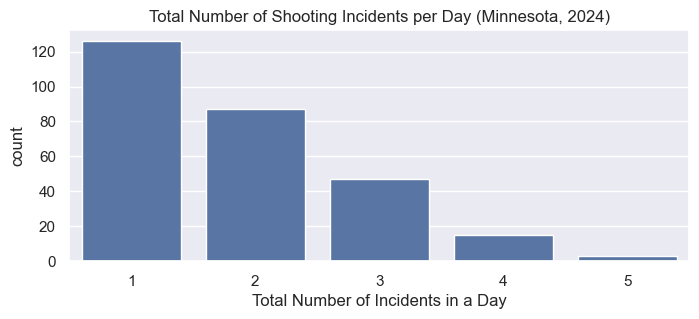

In [18]:
sns.set_theme()
plt.figure(figsize=(8,3))
sns.countplot(rage_days, x='no_inc').set_title('Total Number of Shooting Incidents per Day (' + scope + ')')
plt.xlabel ('Total Number of Incidents in a Day')

* Because this dataset was originally aggregated from rows of shooting incidents, days of the year when no shooting incidents took place are not represented in the data. It's worth noting that there were **88 days when no shooting incidents occurred** (366 - 278).
* There are also no days with significantly more shooting incidents than the others, and with no particular reason to expect more incidents on the 3 days in which 5 incidents occurred, it appears that this activity is the result of little more than random chance. When we aggregate these incidents by something arbitrary such as date within a month, we increase the randomness of the totals, introducing more noise making the results even harder to explain through reasoning.

In [19]:
months=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug','Sep','Oct','Nov', 'Dec']
rage_days['month'] = pd.Categorical(rage_days['month'], categories=months, ordered=True)
rage_days[(rage_days['day'] == 24)].sort_values(by='month')

,day,month,dow,no_inc,total_inj,total_kld,total_inj_kill
210,24,Jan,Wed,1,0,1,1
209,24,Feb,Sat,3,3,0,3
213,24,Mar,Sun,1,2,0,2
206,24,Apr,Wed,1,2,0,2
214,24,May,Fri,1,1,0,1
212,24,Jun,Mon,3,2,1,3
211,24,Jul,Wed,2,1,1,2
207,24,Aug,Sat,2,2,1,3
217,24,Sep,Tue,2,1,2,3
216,24,Oct,Thu,2,1,1,2


**Review of Incidents on the 24th**: Perhaps the 24th had the highest number of incidents because there were no 24ths without an incident rather than having any particular days contributing a larger number of incidents (Min=1, Max=3).

## Analysis of number of Victims Killed and Injured per Shooting Incident

(-0.5, 4.5)

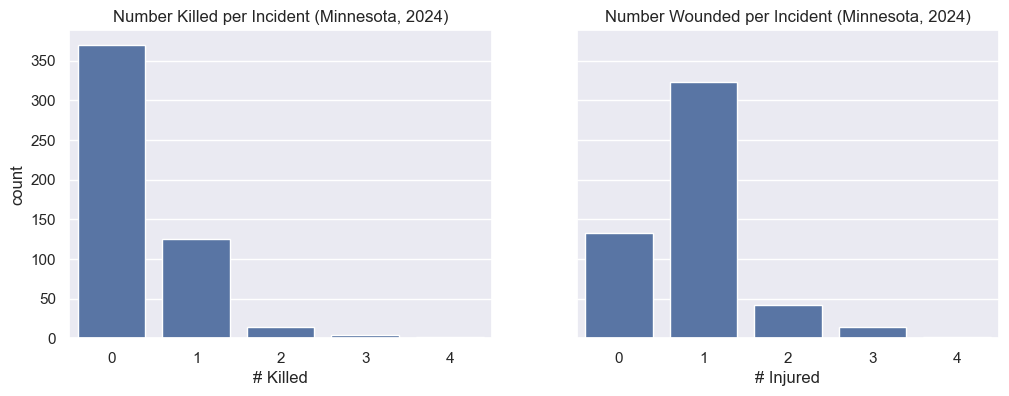

In [20]:
# Set up the matplotlib figure
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

sns.countplot(df, x='t_kill', ax=ax1).set_title('Number Killed per Incident (' + scope + ')')
ax1.set_xlabel("# Killed")
ax1.set_xlim(-0.5, 4.5)
sns.countplot(df, x='t_inj', ax=ax2).set_title('Number Wounded per Incident (' + scope + ')')
ax2.set_xlabel("# Injured")
ax2.set_xlim(-0.5, 4.5)

* So when we compare these 2 figures to the ones produced for 'Mass' shooting incidents - we can see that the vast majority of incidents where at least 1 person is shot involve nobody being killed and 1 person injured. There are a relatively small number of incidents where nobody is injured or killed, and nobody arrested. Further information regarding these subgroups are presented below. 

In [21]:
counts = pd.crosstab(df['v_killed'], df['v_injured'])

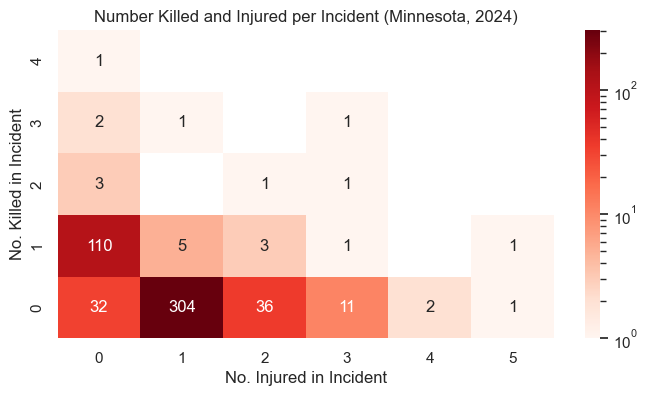

In [22]:
sns.set_style("white")
plt.figure(figsize=(8,4))
ax = sns.heatmap(counts, 
                 annot=True, 
                 fmt="d", 
                 norm=LogNorm(),
                 cmap="Reds")
ax.set_ylabel('No. Killed in Incident')
ax.set_xlabel('No. Injured in Incident')
ax.invert_yaxis()
plt.grid(False)
plt.title('Number Killed and Injured per Incident (' + scope + ')')
plt.show()

In [23]:
percentages = counts / counts.values.sum() * 100

In [24]:
perc_focus = percentages.loc[0:4, 0:6]

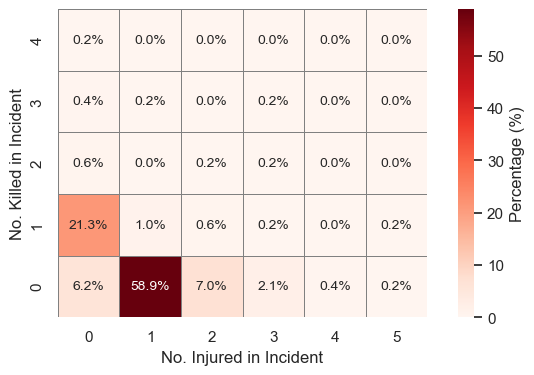

In [25]:
annot = perc_focus.map(lambda v: f"{v:.1f}%")

fig, ax = plt.subplots(figsize=(8,4))
sns.heatmap(
    perc_focus,
    ax=ax,
    annot=annot,    # preformatted strings
    fmt='',         # use the strings exactly (no extra formatting)
    cmap='Reds',
    cbar_kws={'label': 'Percentage (%)'},
    square=True,
    linewidths=0.5,
    linecolor='gray',
    annot_kws={'fontsize':10}
)

# flip so that the first row (y=0) appears at the bottom
ax.invert_yaxis()
ax.set_ylabel('No. Killed in Incident')
ax.set_xlabel('No. Injured in Incident')
plt.show()

In [26]:
s_counts = pd.crosstab(df['s_killed'], df['s_injured'])

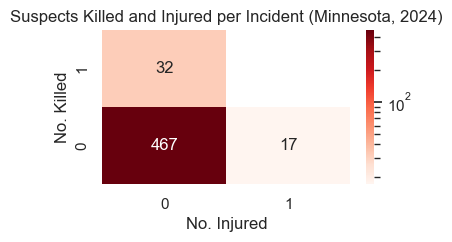

In [27]:
sns.set_style("white")
plt.figure(figsize=(4,2))
ax = sns.heatmap(s_counts, 
                 annot=True, 
                 fmt="d", 
                 norm=LogNorm(),
                 cmap="Reds")
ax.set_ylabel('No. Killed')
ax.set_xlabel('No. Injured')
ax.invert_yaxis()
plt.grid(False)
plt.title('Suspects Killed and Injured per Incident (' + scope + ')')
plt.show()

In [28]:
sia_counts = pd.crosstab(df['s_injured'], df['s_arrested'])

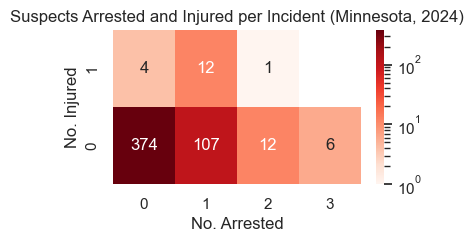

In [29]:
sns.set_style("white")
plt.figure(figsize=(4,2))
ax = sns.heatmap(sia_counts, 
                 annot=True, 
                 fmt="d", 
                 norm=LogNorm(),
                 cmap="Reds")
ax.set_ylabel('No. Injured')
ax.set_xlabel('No. Arrested')
ax.invert_yaxis()
plt.grid(False)
plt.title('Suspects Arrested and Injured per Incident (' + scope + ')')
plt.show()

In [30]:
no_vict = df[(df['v_killed'] == 0) & (df['v_injured'] == 0)]
no_vict.sample(5)

,date,dow,day,month,week,city,address,v_killed,v_injured,s_killed,s_injured,s_arrested,t_kill,t_inj,total,id
387,2024-04-14,Sun,14,Apr,15,Cannon Falls,32021 County 24 Blvd,0,0,1,0,0,1,0,1,2880613
409,2024-04-02,Tue,2,Apr,14,Burnsville,600 State Hwy 13,0,0,0,0,1,0,0,0,2869041
462,2024-02-12,Mon,12,Feb,7,Saint Paul,275 Lexington Pkwy N,0,0,0,0,1,0,0,0,2827029
344,2024-05-20,Mon,20,May,21,Red Wing,2451 Eagle Ridge Dr,0,0,0,0,0,0,0,0,2917977
457,2024-02-18,Sun,18,Feb,7,Elbow Lake,324 10th Ave,0,0,1,0,0,1,0,1,2833403


In [32]:
sus_counts = pd.crosstab(no_vict['s_killed'], no_vict['s_injured'])

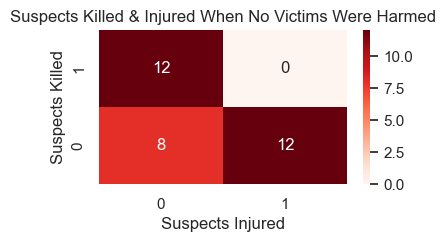

In [33]:
plt.figure(figsize=(4,2))
ax = sns.heatmap(sus_counts, 
                 annot=True, 
                 fmt="d", 
                 cmap="Reds")

ax.invert_yaxis()
ax.set_ylabel('Suspects Killed')
ax.set_xlabel('Suspects Injured')
plt.title('Suspects Killed & Injured When No Victims Were Harmed')
plt.show()

In [34]:
justice = no_vict[(no_vict.s_arrested > 1)]
justice.nlargest(5, 's_arrested')

,date,dow,day,month,week,city,address,v_killed,v_injured,s_killed,s_injured,s_arrested,t_kill,t_inj,total,id


* As we can see in the breakdown of suspects arrested, injured or killed, there don't appear to have been many incidents in Minnesota in 2024 that involved a group of suspects, and therefore the chances of arresting more than one suspect in an incident that involved no injured victims is small in an area of relative lower shooting incidence.

In [35]:
no_harm_done = no_vict[(no_vict['s_killed'] == 0) & (no_vict['s_injured'] == 0) & (no_vict['s_arrested'] == 0)]
no_harm_done

,date,dow,day,month,week,city,address,v_killed,v_injured,s_killed,s_injured,s_arrested,t_kill,t_inj,total,id
344,2024-05-20,Mon,20,May,21,Red Wing,2451 Eagle Ridge Dr,0,0,0,0,0,0,0,0,2917977


**Nobody Hurt:** The only incident that involved nobody getting injured was the discovery of an unloaded shotgun in a vehicle on school grounds.
